In [1]:
import sys
import matplotlib.pyplot as plt
from importlib import reload

from tfmplayground.priors.experiments import utils

# add parent directory to path for imports
sys.path.append('..')

import data_analysis
from classification import plots

# reload modules to pick up any changes
reload(data_analysis)
reload(utils)
reload(plots)

from analyzer import ClassificationDataAnalyzer
from tfmplayground.priors.experiments.utils import load_multiple_analyzers
from classification.plots import (
    plot_class_samples,
    plot_single_prior_overview,
    plot_class_distributions,
    plot_feature_distributions,
    plot_class_separability,
    plot_complexity_metrics,
    plot_feature_redundancy,
    plot_prior_similarity,
)

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

/opt/anaconda3/envs/prior/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

Specify the directory containing your classification prior HDF5 files.

In [2]:
# Configure data directory
DATA_DIR = './results/data'  # Adjust this path as needed

# Auto-discover and load all classification analyzers
analyzers = load_multiple_analyzers(DATA_DIR, ClassificationDataAnalyzer, verbose=True)

print(f"\nLoaded {len(analyzers)} classification prior(s):")
for prior_name in analyzers.keys():
    print(f"  - {prior_name}")

Scanning ./results/data for prior data files...
   Found 4 prior(s): ['tabicl', 'ticl_boolean_conjunctions', 'ticl_classification_adapter', 'ticl_step_function']

 Loading analyzers...
Loading data from results/data/prior_tabicl_1x8_1024x100.h5...
  Loaded 8 samples
  Problem type: classification
   [OK] tabicl
Loading data from results/data/prior_ticl_boolean_conjunctions_1x8_1024x100.h5...
  Loaded 8 samples
  Problem type: classification
   [OK] ticl_boolean_conjunctions
Loading data from results/data/prior_ticl_classification_adapter_1x8_1024x100.h5...
  Loaded 8 samples
  Problem type: classification
   [OK] ticl_classification_adapter
Loading data from results/data/prior_ticl_step_function_1x8_1024x100.h5...
  Loaded 8 samples
  Problem type: classification
   [OK] ticl_step_function

[OK] Loaded 4/4 prior(s)

Loaded 4 classification prior(s):
  - tabicl
  - ticl_boolean_conjunctions
  - ticl_classification_adapter
  - ticl_step_function


---

# Part 1: Individual Prior Sample Visualizations

Visualize what the data from each classification prior looks like.

## 1.1 Class Distributions and Feature Space

**What you're looking at:**

- **Left plot (Stacked Bar Chart)**: Shows the distribution of classes across 5 different samples. Each color represents a different class. The height shows the number of instances per class. Compare bar heights to see if classes are balanced or imbalanced.

- **Right plot (PCA Feature Space)**: High-dimensional features reduced to 2D using PCA. Each point is a data instance, colored by its class label. Shows if classes are separable in the feature space.

**What to look for:**
- Balanced vs imbalanced class distributions (uniform vs varied bar segments)
- Clear clustering by color in PCA plot = good class separability
- Overlapping colors = classes are harder to separate


Prior: tabicl


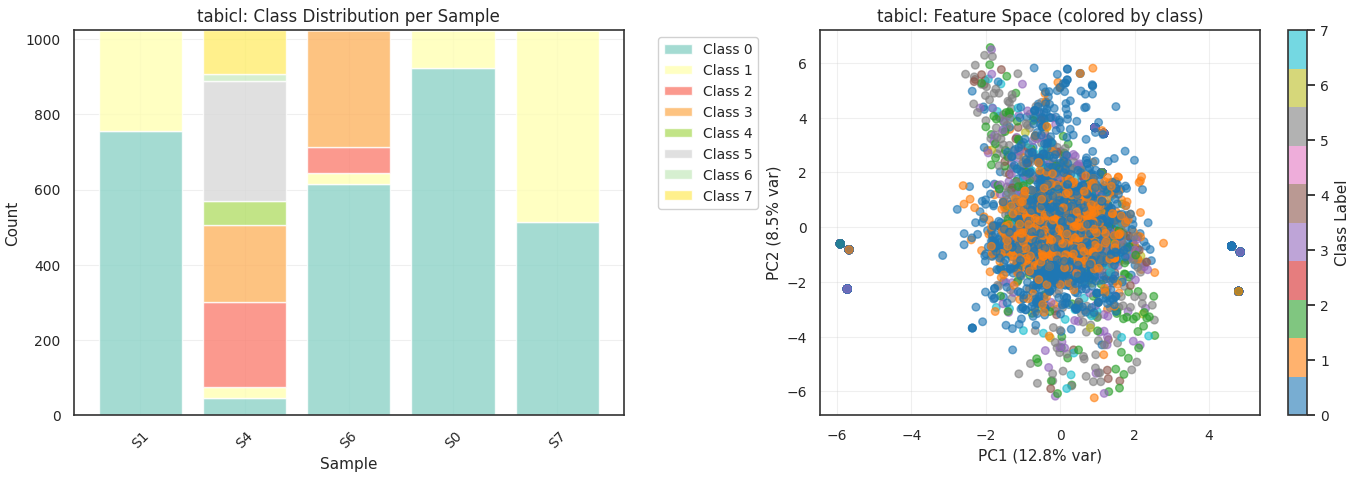


Prior: ticl_boolean_conjunctions


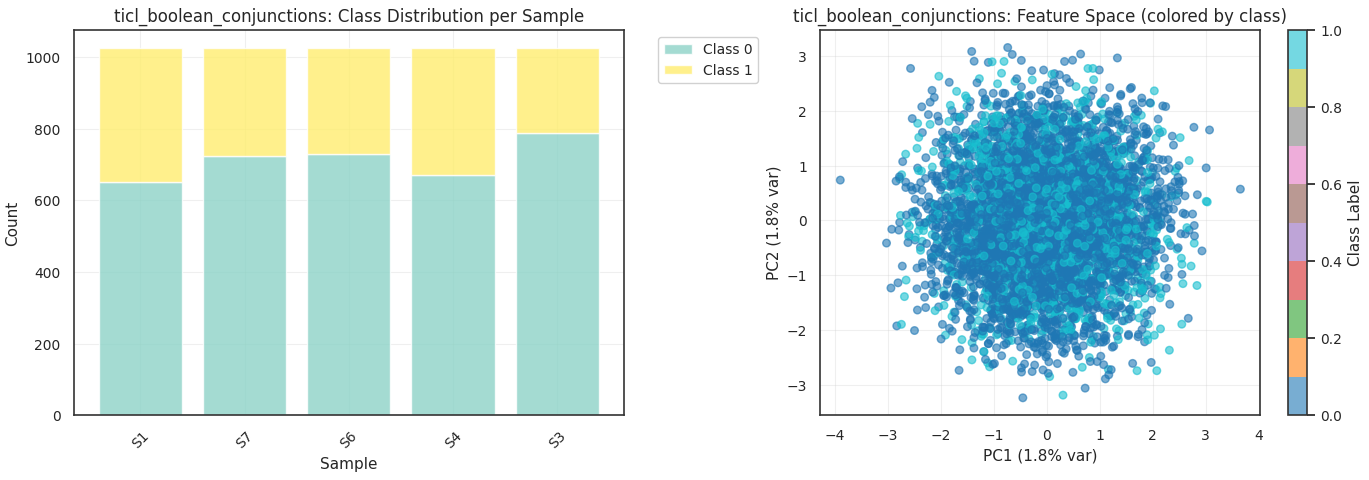


Prior: ticl_classification_adapter


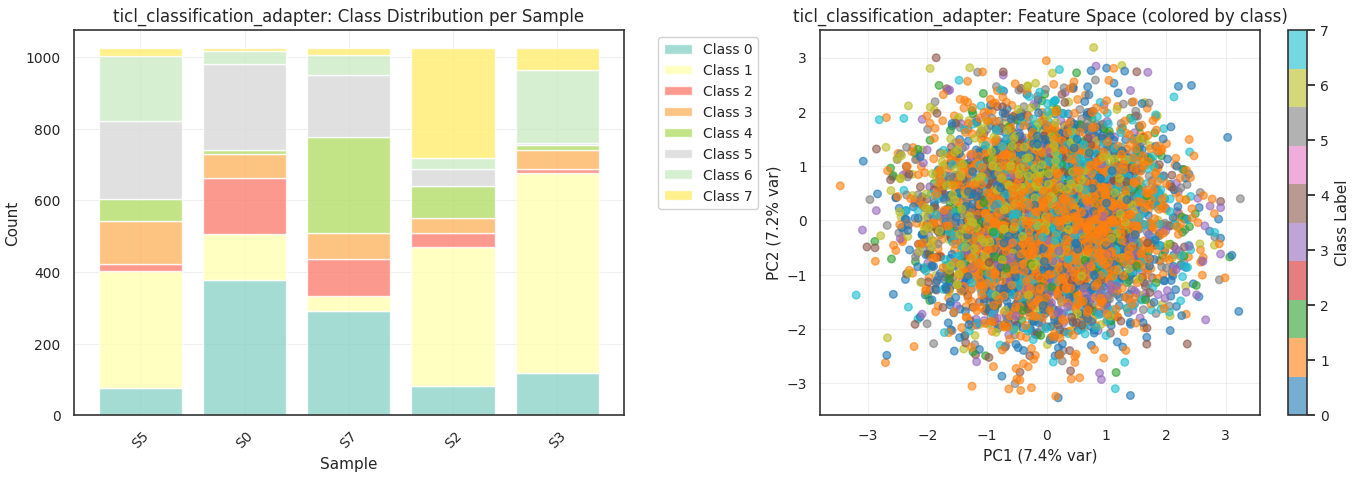


Prior: ticl_step_function


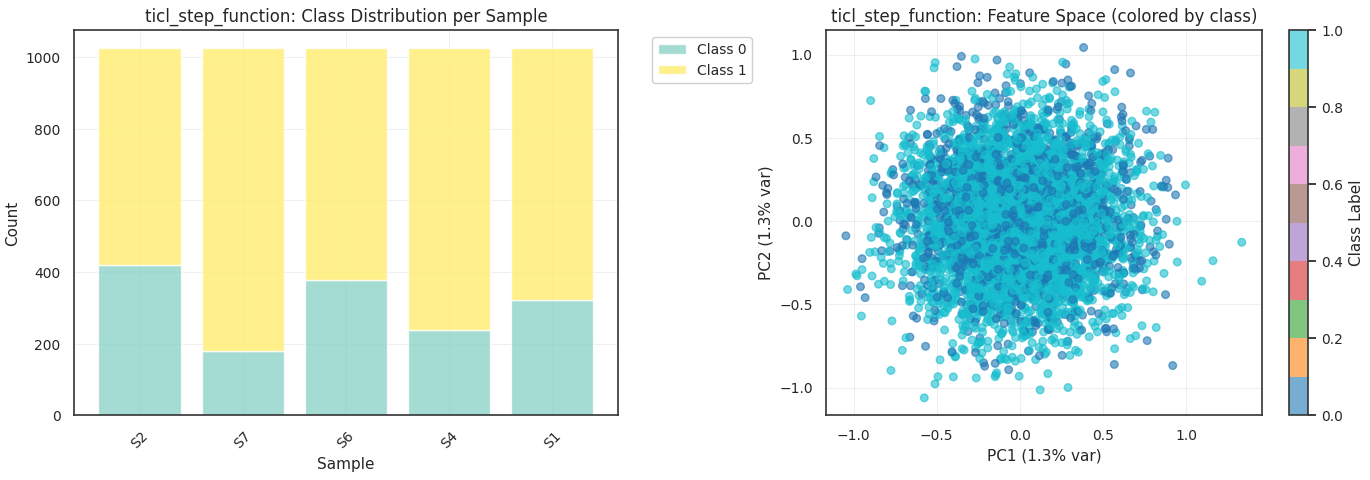

In [3]:
# Plot class samples for each prior
for prior_name, analyzer in analyzers.items():
    print(f"\n{'='*60}")
    print(f"Prior: {prior_name}")
    print(f"{'='*60}")
    
    fig, axes = plot_class_samples(analyzer, prior_name, n_samples=5)
    plt.show()

## 1.2 Comprehensive Prior Overview

A 6-panel view showing multiple aspects of the classification data:

**Top (PCA Projection)**: Feature space reduced to 2D, colored by class. Look for distinct clusters (good separability) vs mixed colors (harder classification).

**Middle-left (Feature Distributions)**: Box plots for the first 10 features. Shows median, quartiles, and outliers for each feature. Helps identify if features have different scales or variability.

**Middle-right (Class Distribution)**: Bar chart showing the overall frequency of each class across all samples. Reveals class balance - uniform height = balanced, varied = imbalanced.

**Bottom-left (Class Balance)**: Histogram showing how balanced classes are within each sample (normalized entropy). Values near 1.0 = perfectly balanced, lower = more imbalanced.

**Bottom-right (Statistics)**: Key summary numbers including number of classes, balance metrics, and dataset info.


Prior: tabicl - Comprehensive Overview


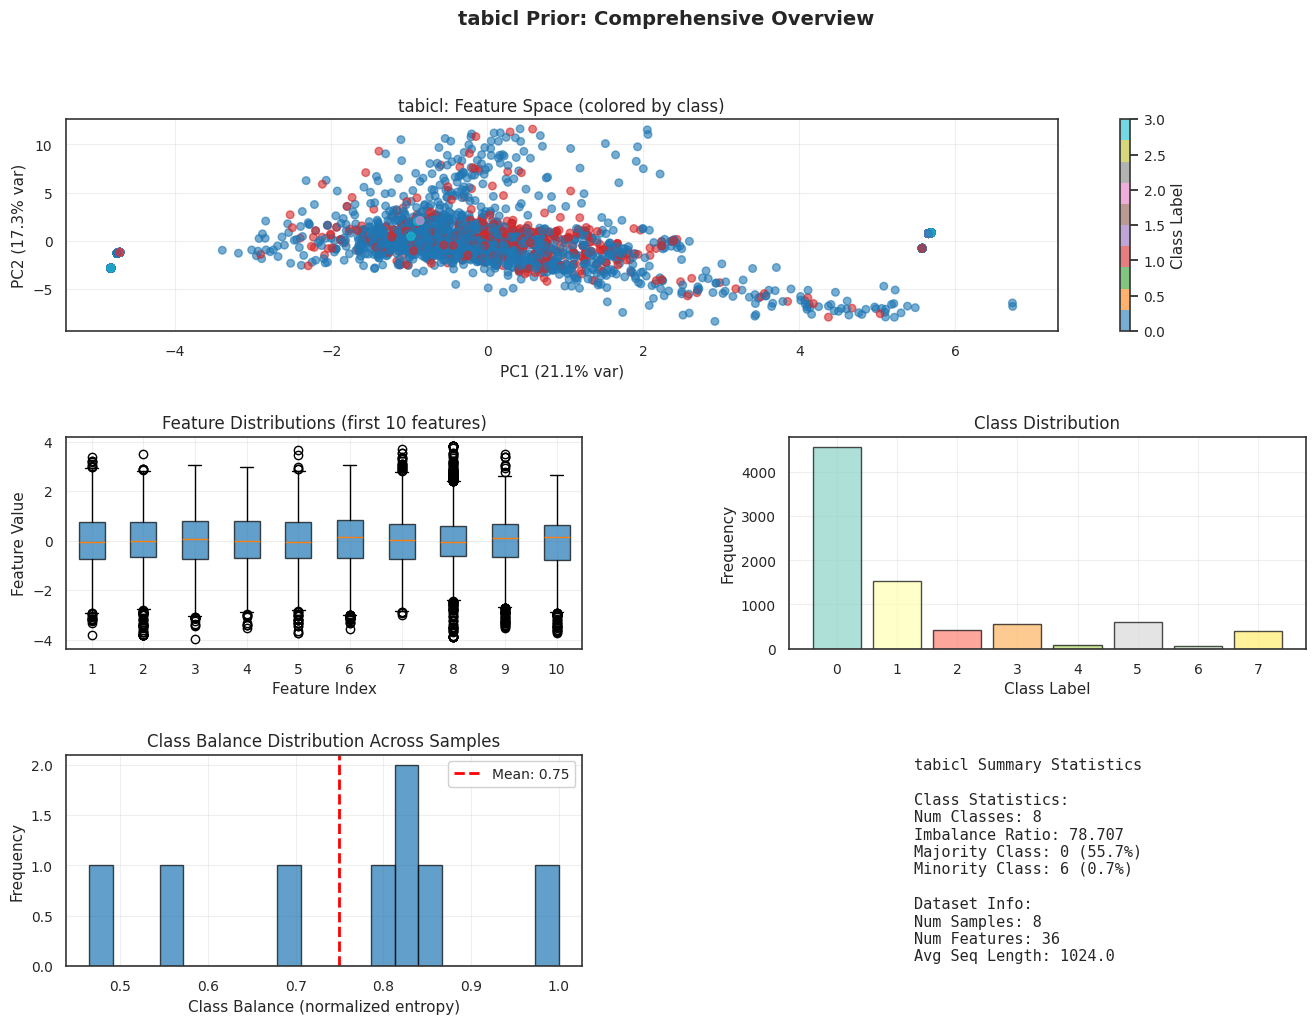


Prior: ticl_boolean_conjunctions - Comprehensive Overview


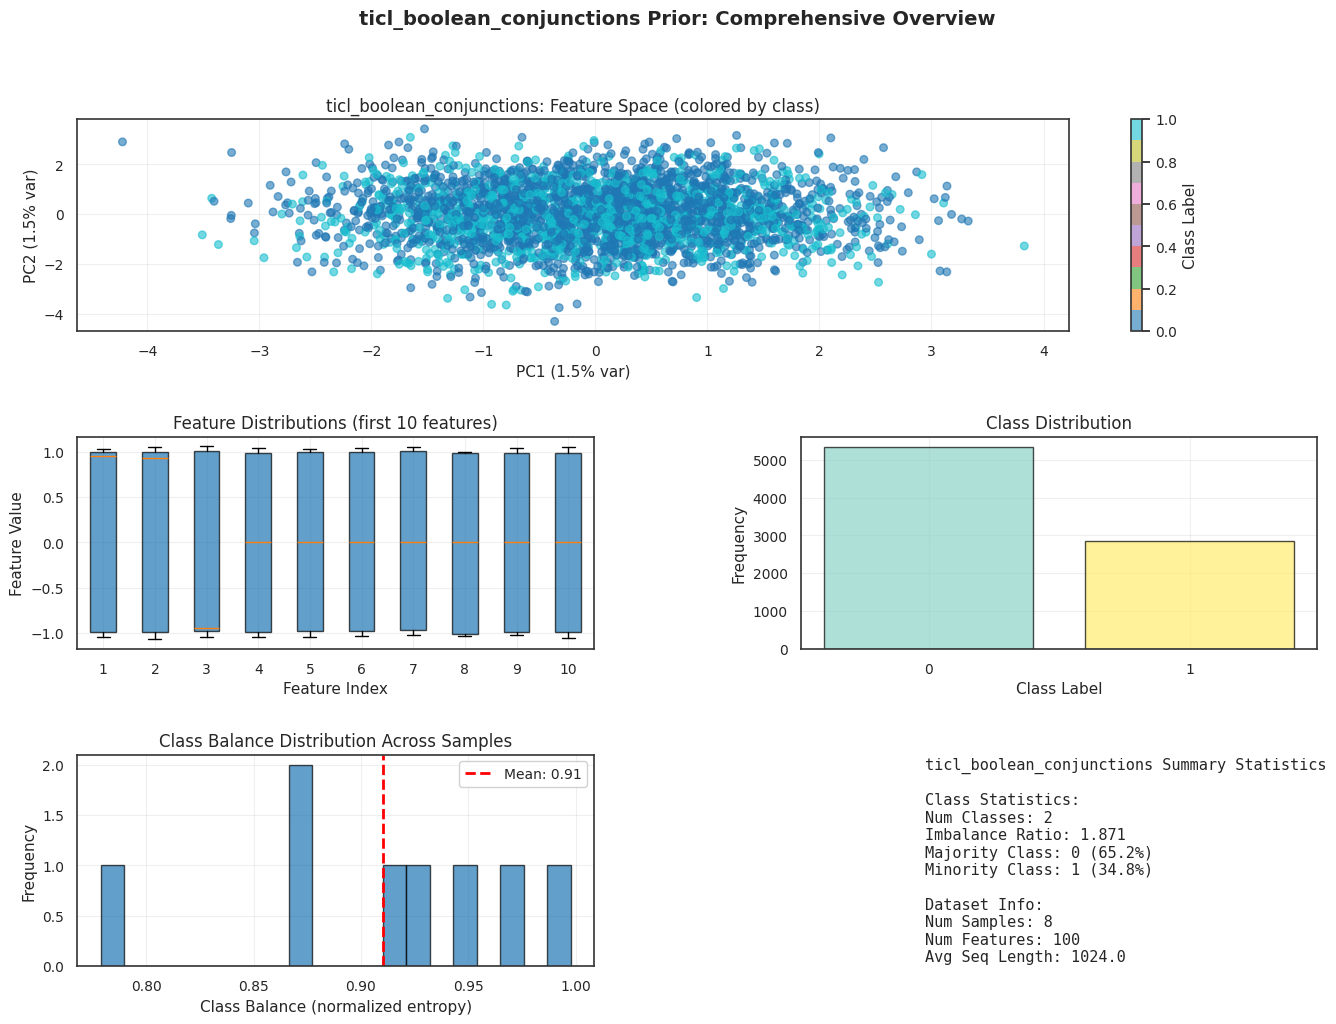


Prior: ticl_classification_adapter - Comprehensive Overview


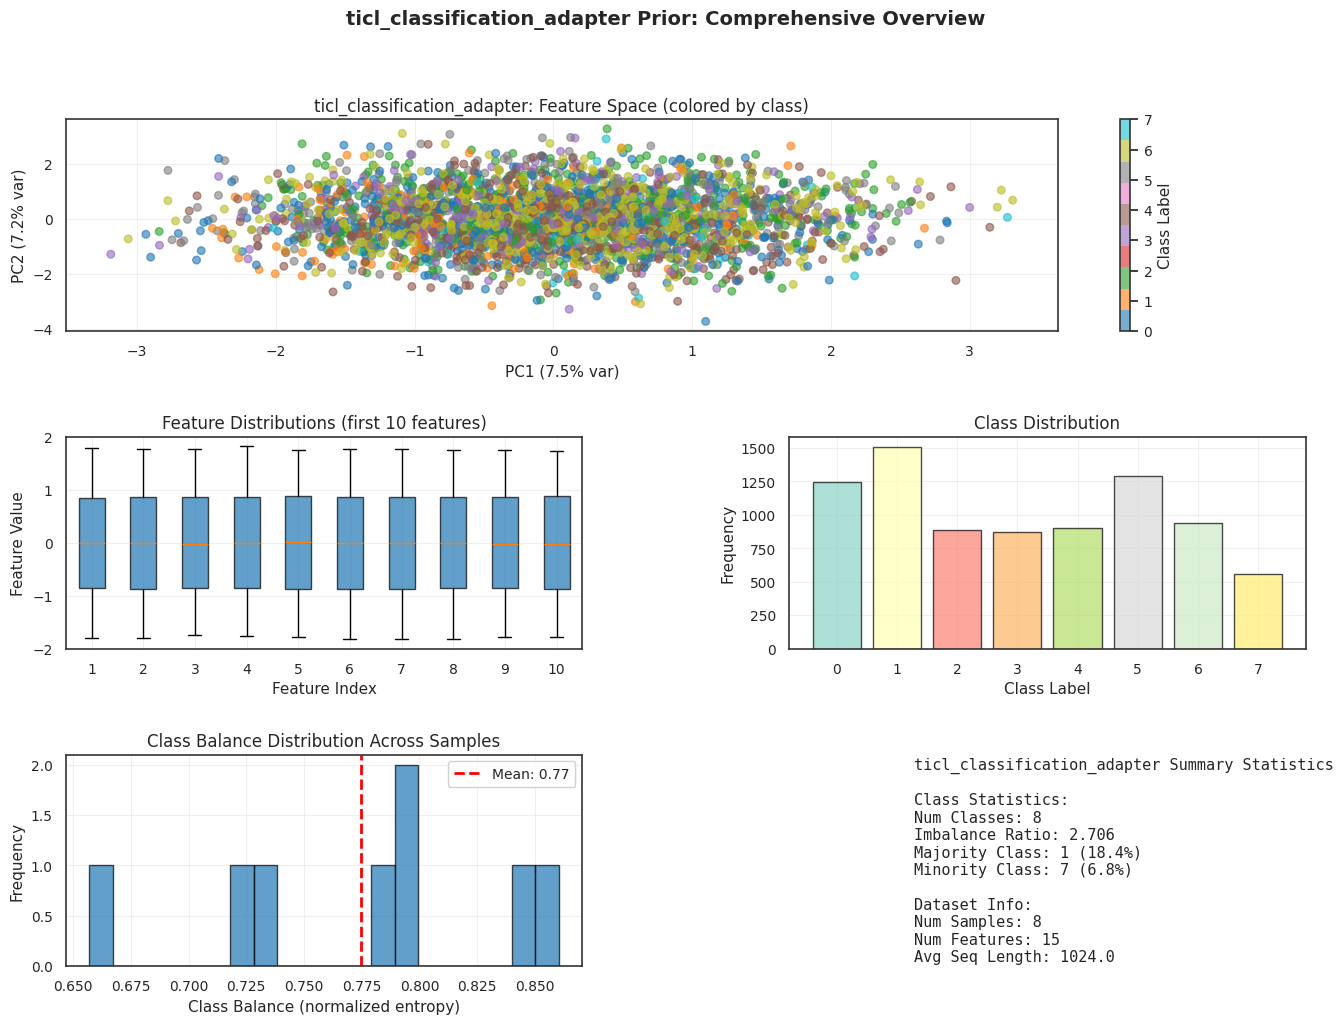


Prior: ticl_step_function - Comprehensive Overview


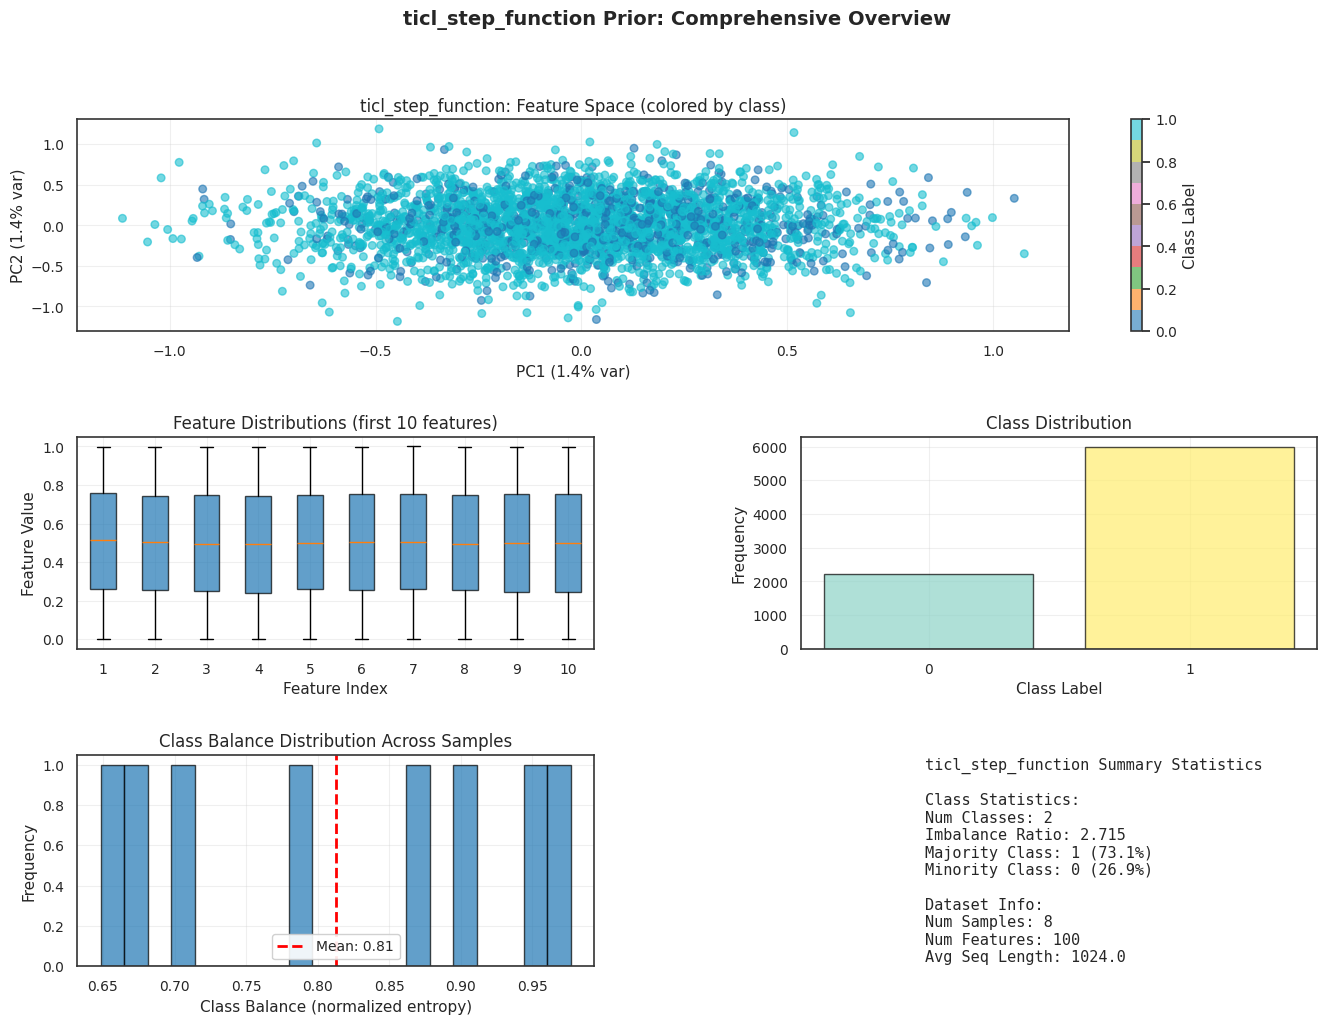

In [4]:
# Comprehensive overview for each prior
for prior_name, analyzer in analyzers.items():
    print(f"\n{'='*60}")
    print(f"Prior: {prior_name} - Comprehensive Overview")
    print(f"{'='*60}")
    
    fig, axes = plot_single_prior_overview(analyzer, prior_name, n_samples=3)
    plt.show()

---

# Part 2: Statistical Comparison Across Priors

Compare different classification priors using statistical metrics and distributions.

## 2.1 Class Distributions Across Priors

**What you're looking at:**

- **Left (Number of Classes)**: How many distinct classes each prior generates. More classes = more complex classification task.

- **Right (Class Balance)**: Normalized entropy measure of class balance (0 to 1). Higher values = more balanced, lower = more imbalanced. The dashed line at 1.0 represents perfect balance.

**What to look for:**
- Binary (2 classes) vs multi-class problems
- Which priors generate balanced vs imbalanced datasets
- Task difficulty scales with both number of classes and imbalance

Comparing class distributions across all priors...


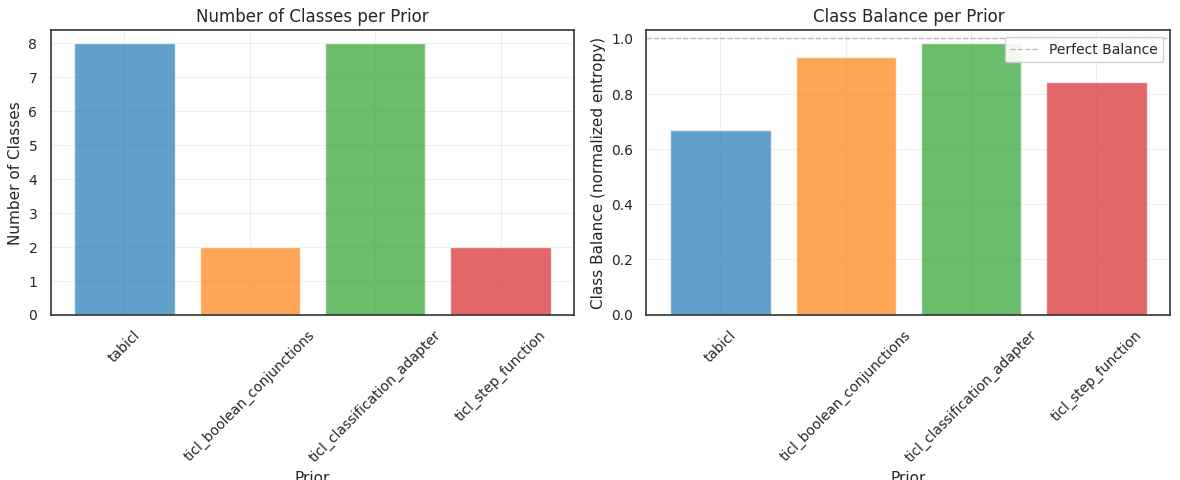

In [5]:
if len(analyzers) > 1:
    print("Comparing class distributions across all priors...")
    fig, axes = plot_class_distributions(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.2 Feature Distributions

**What you're looking at:**

- **Left (Mean Feature Value)**: Average value across all features and samples for each prior.

- **Right (Feature Standard Deviation)**: How much features vary for each prior.

**What to look for:**
- Different priors may normalize features differently (centered at 0, positive, etc.)
- Higher std = more feature variability, which can affect model training
- Compare scales across priors to understand data preprocessing needs

Comparing feature distributions...


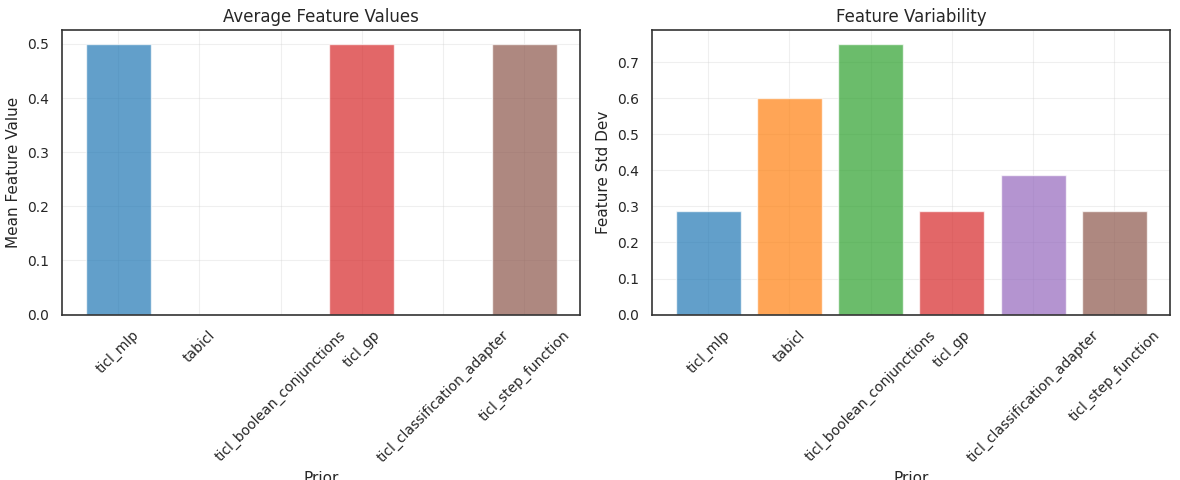

In [ ]:
if len(analyzers) > 1:
    print("Comparing feature distributions...")
    fig, axes = plot_feature_distributions(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.3 Class Separability

**What you're looking at:**

- **Left (Fisher Discriminant Ratio)**: Violin plot showing the distribution of Fisher ratios across features. Fisher ratio = (between-class variance) / (within-class variance). Higher values = classes are more separated in that feature dimension.

- **Right (Mean Separability)**: Average Fisher ratio across all features for each prior.

**What to look for:**
- Higher Fisher ratios = easier classification task (classes are well-separated)
- Low ratios = classes overlap significantly (harder task)
- Compare priors to identify which generate more/less separable problems
- Wide violin distributions = some features are very discriminative, others are not

Comparing class separability...


/opt/anaconda3/envs/prior/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/prior/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/envs/prior/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/prior/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning

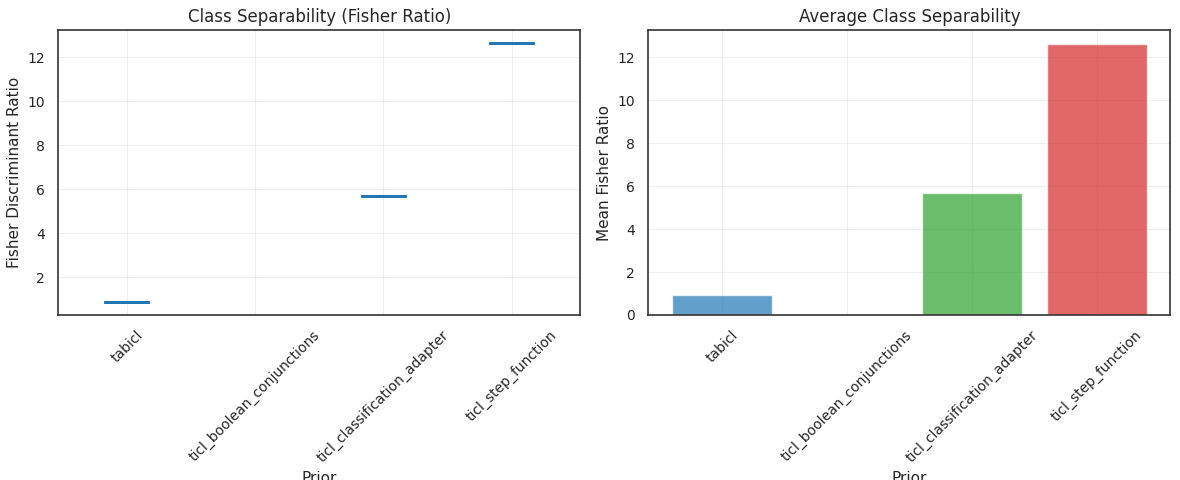

In [6]:
if len(analyzers) > 1:
    print("Comparing class separability...")
    fig, axes = plot_class_separability(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.4 Complexity Metrics

**What you're looking at:**

- **Top-left (Dimensionality)**: Average number of features per prior. Higher = more dimensions to learn from (can help or hurt depending on relevance).

- **Top-right (Sequence Length)**: Average number of data points per sample. More data = more training examples per task.

- **Bottom-left (Number of Classes)**: Multi-class complexity. More classes = harder classification.

- **Bottom-right (Samples per Class)**: Average training examples available per class. Lower values = harder to learn rare classes.

**What to look for:**
- Task difficulty increases with: more classes, fewer samples per class, higher dimensionality (if features aren't informative)
- Balance between dimensionality and sequence length
- Imbalance warning: low samples-per-class for some priors

Comparing complexity metrics...


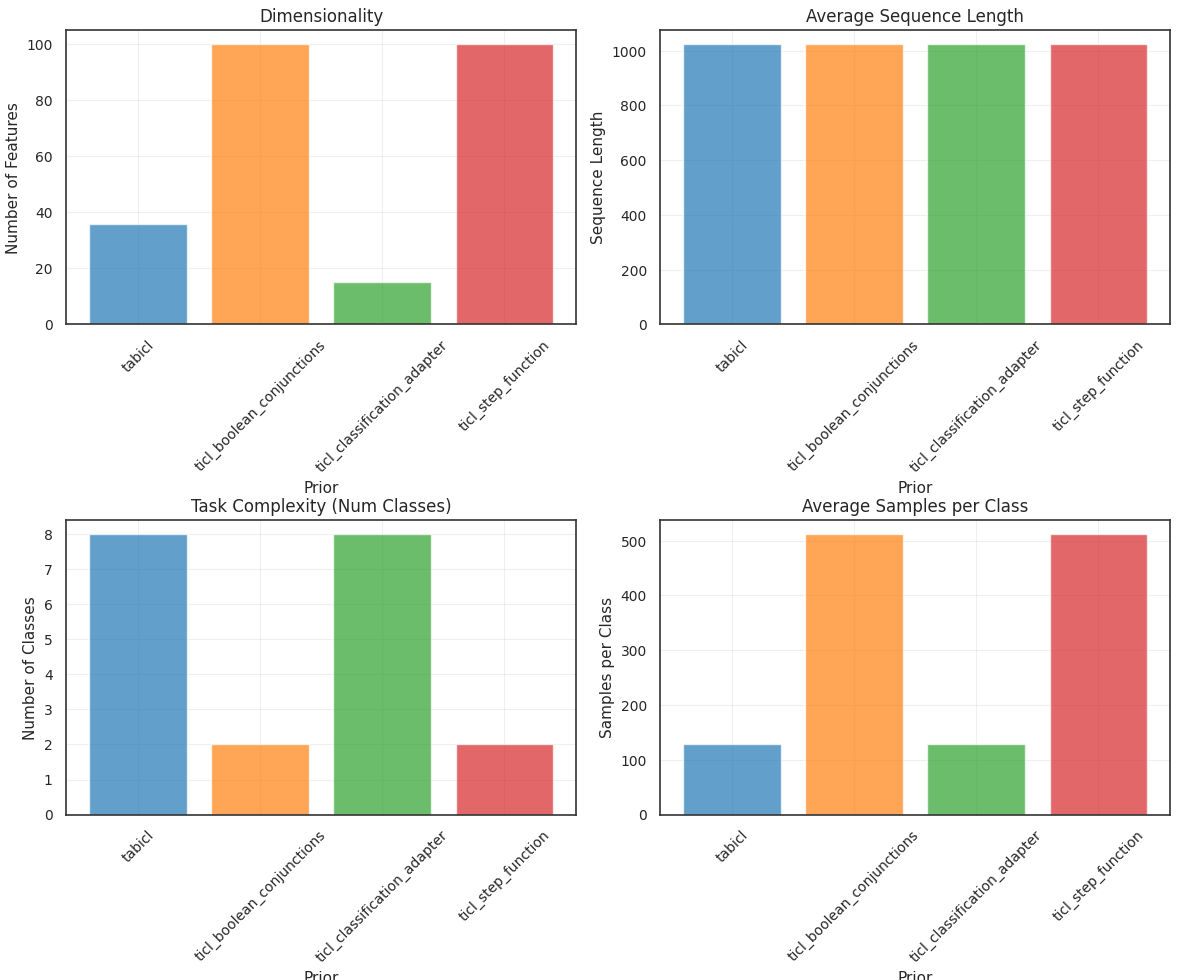

In [7]:
if len(analyzers) > 1:
    print("Comparing complexity metrics...")
    fig, axes = plot_complexity_metrics(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.5 Feature Redundancy

**What you're looking at:**

- **First N plots (Heatmaps)**: Inter-feature correlation matrices for each prior. Red = positive correlation, blue = negative, white = no correlation.

- **Last plot (Summary)**: Mean absolute correlation between features across priors.

**What to look for:**
- Strong correlations (dark red/blue) indicate redundant features that carry similar information
- Low correlation = independent features (good for diversity)
- High correlation = potential for dimensionality reduction
- Some models benefit from redundancy (ensemble methods), others don't (linear models)

Analyzing feature redundancy...


/opt/anaconda3/envs/prior/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/prior/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


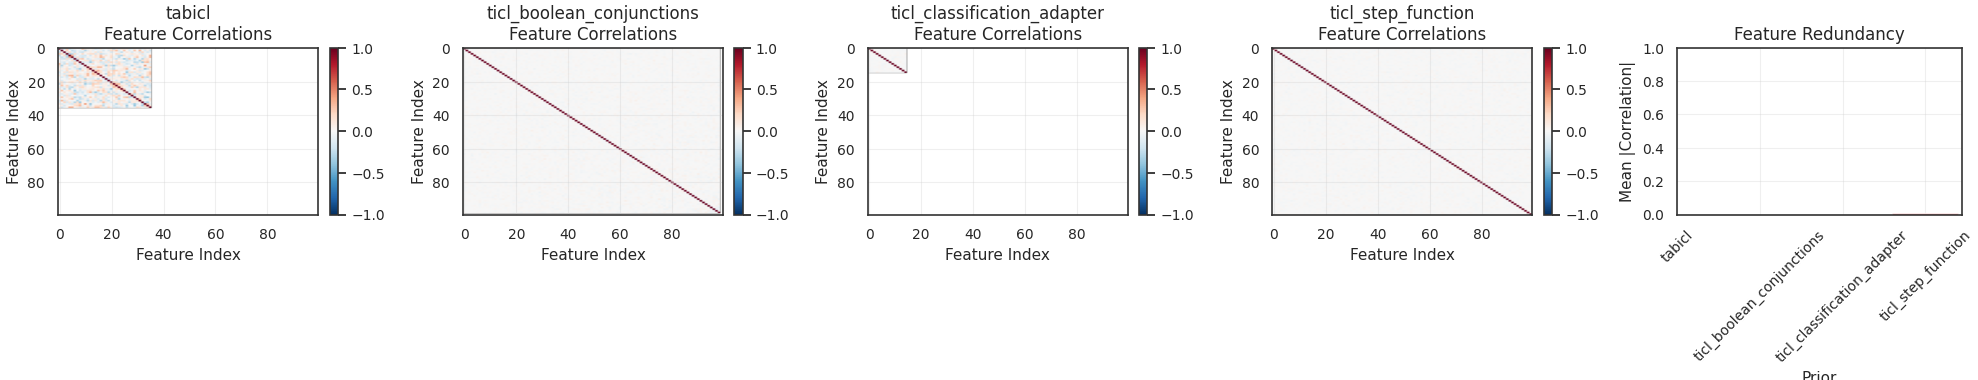

In [8]:
if len(analyzers) > 1:
    print("Analyzing feature redundancy...")
    fig, axes = plot_feature_redundancy(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")

## 2.6 Prior Similarity

**What you're looking at:**

- **One heatmap:** Each cell `(i, j)` is the correlation between two priors' **summary vectors**.  
- Each summary vector compresses a prior into a few scalars:
  - Dimensionality (#features, seq length, eval position)
  - Class characteristics (num classes, class balance, imbalance ratio)
  - Feature stats (mean, std)
  - Separability (Fisher ratio, between/within variance ratio)

**What to look for:**

- **Red cells (~1):** Priors with **very similar** classification characteristics → potentially redundant for training diversity.
- **White cells (~0):** No strong similarity in these stats.
- **Blue cells (< 0):** Priors that differ systematically → good for **diversity** in training.
- Look for **clusters of red** to spot families of similar priors and **outliers** that bring unique behavior.

Analyzing similarity between priors...


/opt/anaconda3/envs/prior/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/prior/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/envs/prior/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [88 89 90 91 92 93 94 95 96 97 98 99] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/envs/prior/li

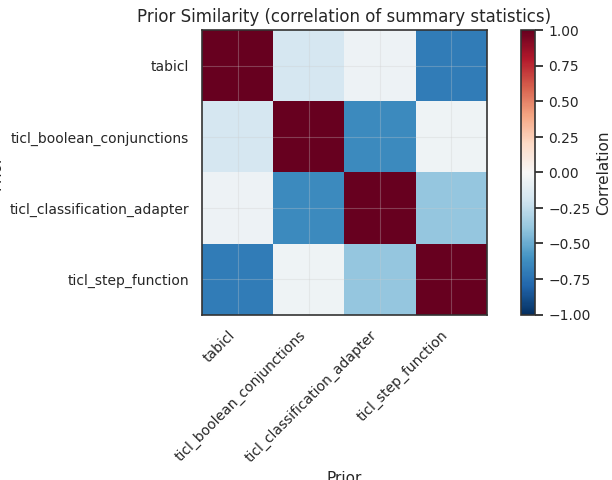

In [9]:
if len(analyzers) > 1:
    print("Analyzing similarity between priors...")
    fig, axes = plot_prior_similarity(analyzers)
    plt.show()
else:
    print("Need at least 2 priors for comparison plots. Skipping...")